In [175]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from itertools import combinations
import seaborn as sns
from difflib import SequenceMatcher

# 1# Data Insight

<p style="text-align: justify;"> In this part, we will display all the 5 different data bases at disposal. Some features will also be simplified into more efficient structures. Eventually, all the data will be merged into one coherent non-repetitive dataframe. </p>

In [176]:
DATA_PATHWAY = './data/'

## 1.1# Data Import

In [177]:
plot_summaries = pd.read_csv(DATA_PATHWAY + 'plot_summaries.txt', sep='\t', header=None, names=['movie_id', 'plot_summary'])
plot_summaries.head(10)

,movie_id,plot_summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
5,5272176,The president is on his way to give a speech. ...
6,1952976,"{{plot}} The film opens in 1974, as a young gi..."
7,24225279,"The story begins with Hannah, a young Jewish t..."
8,2462689,Infuriated at being told to write one final co...
9,20532852,A line of people drool at the window of the s...


In [178]:
name_clusters = pd.read_csv(DATA_PATHWAY + 'name.clusters.txt', sep='\t', header=None, names=['char_name', 'freebase_char_actor_map_id'])
name_clusters.head(10)

,char_name,freebase_char_actor_map_id
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn
5,Josh Framm,/m/0jt3p3
6,Josh Framm,/m/0jt3t3
7,Caspian X,/m/0646flc
8,Caspian X,/m/02vd12n
9,Apostle Peter,/m/02vd6_v


In [179]:
tvtropes_clusters = pd.read_csv(DATA_PATHWAY + 'tvtropes.clusters.txt', sep='\t', header=None, names=['char_trope', 'attr'])
tvtropes_clusters.head(10)

,char_trope,attr
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."
5,adventurer_archaeologist,"{""char"": ""Indiana Jones"", ""movie"": ""Indiana Jo..."
6,adventurer_archaeologist,"{""char"": ""Indiana Jones"", ""movie"": ""Indiana Jo..."
7,adventurer_archaeologist,"{""char"": ""Indiana Jones"", ""movie"": ""Indiana Jo..."
8,adventurer_archaeologist,"{""char"": ""Evelyn Carnahan-O'Connell"", ""movie"":..."
9,arrogant_kungfu_guy,"{""char"": ""Han"", ""movie"": ""Enter the Dragon"", ""..."


In [180]:
char_meta_columns = ['movie_id',
                     'freebase_movie_id',
                     'release_date',
                     'char_name',
                     'actor_birth_date',
                     'actor_gender',
                     'actor_height', 
                     'freebase_actor_ethnicity',
                     'actor_name',
                     'actor_age_at_movie_release',
                     'freebase_char_actor_map_id',
                     'freebase_char_id',
                     'freebase_actor_id']

char_metadata = pd.read_csv(DATA_PATHWAY + 'character.metadata.tsv', sep='\t', header=None, names=char_meta_columns)
char_metadata.head(5)

,movie_id,freebase_movie_id,release_date,char_name,actor_birth_date,actor_gender,actor_height,freebase_actor_ethnicity,actor_name,actor_age_at_movie_release,freebase_char_actor_map_id,freebase_char_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [181]:
movie_meta_columns = ['movie_id',
                    'freebase_movie_id',
                    'movie_name',
                    'release_date',
                    'box_office_revenue',
                    'runtime',
                    'languages',
                    'countries',
                    'genres']

movie_metadata = pd.read_csv(DATA_PATHWAY + 'movie.metadata.tsv', sep='\t', header=None, names=movie_meta_columns)
movie_metadata.head(5)

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


# Datetime Features

In [182]:
# Conversions of dates int truncated datetime.datetime class
movie_metadata.release_date = pd.to_datetime(movie_metadata.release_date.replace(np.nan, pd.NaT),\
                                       errors='coerce',\
                                       exact=False,\
                                       infer_datetime_format=True)\
                                       .apply(lambda d : d.date())
                                       
movie_metadata.release_date = pd.to_datetime(movie_metadata.release_date)
movie_metadata.head(5)

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


# Release Date Feature

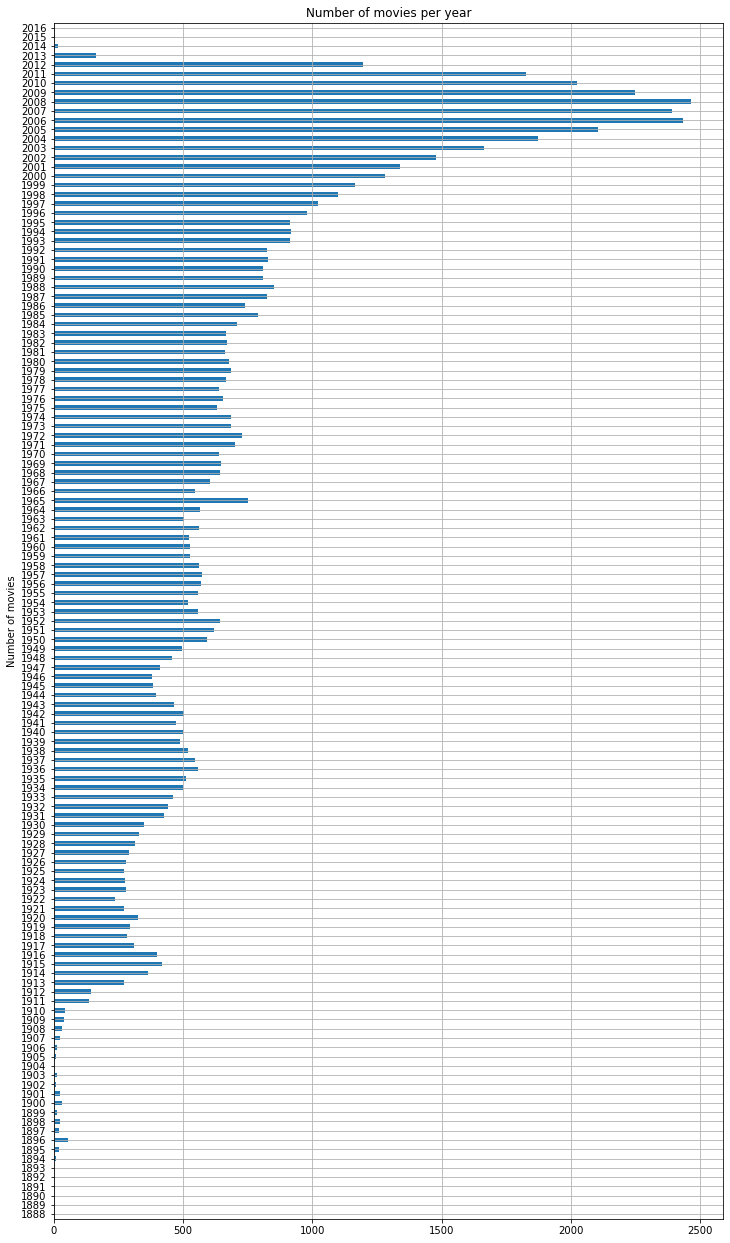

In [183]:
#plotting the number of movies over years
movie_metadata = movie_metadata[movie_metadata.release_date.dt.year.notnull()]

movie_metadata.release_date.dt.year.value_counts()\
                             .sort_index()\
                             .plot(kind='barh',\
                                   figsize=(12,22),\
                                   grid=True,\
                                   title='Number of movies per year',\
                                   xlabel='Number of movies')
                             
plt.show()

# Feature Noisiness

In [184]:
non_NaN_ratio = (movie_metadata.notnull().sum() / len(movie_metadata)) * 100

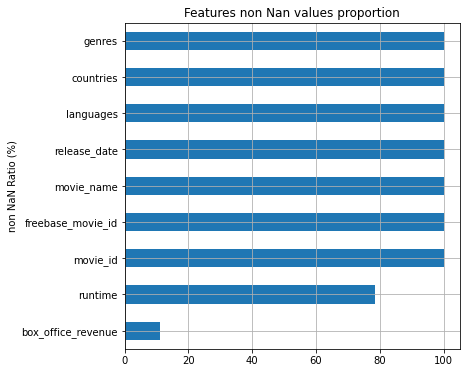

In [185]:

non_NaN_ratio.sort_values().plot(kind='barh',\
                                 figsize=(6,6),\
                                 grid=True,\
                                 title='Features non Nan values proportion',\
                                 xlabel='non NaN Ratio (%)',\
                                 fontsize=10)
plt.show()

## 1.2# Features Simplification

<p style="text-align: justify;"> In this subpart, we will decompose complex features and repetitive informations into simpler additional features for computational efficiency.  </p>

### 1.2.1# Tvtropes_clusters

In [186]:
# Conversion of the dict feature into several columns
clust = tvtropes_clusters.attr.apply(lambda x: pd.Series(ast.literal_eval(x)))
tvtropes_clusters = pd.concat([tvtropes_clusters, clust], axis=1).drop('attr', axis = 1)

# Renaming of the columns
tvtropes_columns = ['char_trope', 
                    'char_name', 
                    'movie_name', 
                    'freebase_char_actor_map_id', 
                    'actor_name']

tvtropes_clusters.columns = tvtropes_columns
tvtropes_clusters.head(5)

,char_trope,char_name,movie_name,freebase_char_actor_map_id,actor_name
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


In [187]:
# Identification of several tropes for one given role
tvtropes_clusters['names'] = tvtropes_clusters.char_name + tvtropes_clusters.movie_name + tvtropes_clusters.actor_name
tvtropes_clusters['names'].is_unique

False

In [188]:
# Extent the non-uniques indexed rows into several columns named like 'char_trope_2'
nb_tropes = tvtropes_clusters.groupby(['names']).cumcount()
m = nb_tropes.astype(bool) * ('_'+(nb_tropes+1).astype(str))
tvtropes_clusters = tvtropes_clusters.set_index(['names', m]).unstack().sort_index(level=1, axis=1).reset_index()
tvtropes_clusters.columns = tvtropes_clusters.columns.map(lambda x: f'{x[0]}{x[1]}')

tvtropes_clusters.head(5)

,names,actor_name,char_name,char_trope,freebase_char_actor_map_id,movie_name,actor_name_2,char_name_2,char_trope_2,freebase_char_actor_map_id_2,...,actor_name_4,char_name_4,char_trope_4,freebase_char_actor_map_id_4,movie_name_4,actor_name_5,char_name_5,char_trope_5,freebase_char_actor_map_id_5,movie_name_5
0,Aaron HallamThe HuntedBenicio del Toro,Benicio del Toro,Aaron Hallam,pupil_turned_to_evil,/m/03ls4jv,The Hunted,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abel TurnerLakeview TerraceSamuel L. Jackson,Samuel L. Jackson,Abel Turner,dirty_cop,/m/02tb650,Lakeview Terrace,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AbuThe Thief of BagdadSabu Dastagir,Sabu Dastagir,Abu,loveable_rogue,/m/0k6nkk,The Thief of Bagdad,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AchillesTroyBrad Pitt,Brad Pitt,Achilles,byronic_hero,/m/0k7ckp,Troy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AgathaMinority ReportSamantha Morton,Samantha Morton,Agatha,junkie_prophet,/m/0k0pgt,Minority Report,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
# Keep only relevant repetitive columns i.e. char_trope features
char_tropes = [feature for feature in tvtropes_clusters if feature.startswith('char_trope')]
tvtropes_clusters = tvtropes_clusters[['movie_name', 'char_name', 'actor_name', 'freebase_char_actor_map_id'] + char_tropes]

tvtropes_clusters.rename(columns = {'char_trope':'char_trope_1'}, inplace = True)
tvtropes_clusters.head(5)

,movie_name,char_name,actor_name,freebase_char_actor_map_id,char_trope_1,char_trope_2,char_trope_3,char_trope_4,char_trope_5
0,The Hunted,Aaron Hallam,Benicio del Toro,/m/03ls4jv,pupil_turned_to_evil,NaN,NaN,NaN,NaN
1,Lakeview Terrace,Abel Turner,Samuel L. Jackson,/m/02tb650,dirty_cop,NaN,NaN,NaN,NaN
2,The Thief of Bagdad,Abu,Sabu Dastagir,/m/0k6nkk,loveable_rogue,NaN,NaN,NaN,NaN
3,Troy,Achilles,Brad Pitt,/m/0k7ckp,byronic_hero,NaN,NaN,NaN,NaN
4,Minority Report,Agatha,Samantha Morton,/m/0k0pgt,junkie_prophet,NaN,NaN,NaN,NaN


### 1.2.2# Movie_metadata

In [190]:
#compare the strings by the 4 first character to perform matching 
def compare(s1,s2):
    return s1[:4]==s2[:4]
#return the string that doesn't contains the substring language
def lang_without_pref(s1,s2):
    return s1 if 'language' not in s1 else s2
#return the string that contains the substring language
def lang_with_pref(s1,s2):
     return s1 if 'language' in s1 else s2

In [191]:
#perform filtering and cleaning the languages and also create a dictionary for matching the anomalies with the right one 
def filter_languages(languages):
    
    Dic = {}
    ENGLISH="english language"
    lower_languages=list(map(lambda x: x.lower(), languages))
    
    #basically every english dialect is consider as just English and not as i.e 'australian aboriginal pidgin english',
    filtered_languages =[ENGLISH if 'english' in language else language for language in lower_languages ]
    Dic["english"] = ENGLISH

    # remove the standard prefix
    filtered_languages= [language.removeprefix('standard ') for language in filtered_languages]
    filtered_languages= [language.replace('\\ud801\\udc16\\ud801\\udc32\\ud801\\udc49\\ud801\\udc4b\\ud801\\udc4c\\ud801\\udc32','english language') for language in filtered_languages]
    
    #replace manually some of the anomalies
    Dic["\\ud801\\udc16\\ud801\\udc32\\ud801\\udc49\\ud801\\udc4b\\ud801\\udc4c\\ud801\\udc32"] = ENGLISH
    filtered_languages= [language.replace('france','french language') for language in filtered_languages]#??????????????
    Dic["france"] = "french language"
    filtered_languages= [language.replace('m\\u0101ori','maori language') for language in filtered_languages]
    Dic["m\\u0101ori"] = "maori language"
    filtered_languages= [language.replace('deutsch','german') for language in filtered_languages]
    Dic["deutsch"] = "german language"
    filtered_languages= [language.replace('cat\\u00e1n','cata') for language in filtered_languages]#??????????????
    Dic["cat\\u00e1n"] = "cata language"


    #match languages mentioned such as japan, german or chines with the correct one japanese language,chinese language
    for tuples in list(combinations(filtered_languages, 2)):
        if(tuples[0] != tuples[1] and compare(tuples[0],tuples[1])):
            filtered_languages[filtered_languages.index(lang_without_pref(tuples[0],tuples[1]))]=lang_with_pref(tuples[0],tuples[1])
            Dic[lang_without_pref(tuples[0],tuples[1])]=lang_with_pref(tuples[0],tuples[1])
            
    filtered_languages=[language for language in filtered_languages  if len(language)>0 ]    
    #add the suffix language to the languages that doesn't have one
    filtered_languages=[language+" language" if 'language' not in language and len(language)>0 else language for language in filtered_languages ]
    
    return filtered_languages,Dic

In [192]:
common_countries_words=['ssr','kingdom','united','republic','of','south','union','and','democratic']

#merge the same countries the have changed their names over time
def contries_dict(countries):
    
    dictionary={}
    countries=list(map(lambda x: x.lower(), countries))
    #manually replacment of anomalies
    countries= [country.replace('malayalam language','india') for country in countries]
    dictionary["malayalam language"] = "india"
    countries= [country.replace('german language','germany') for country in countries]
    dictionary["german language"] = "germany"
    countries= [country.replace('ukranian ssr','ukrainian ssr') for country in countries]    
    dictionary["ukranian ssr"] = "ukrainian ssr"


    #check matches between the country names , if there is a match add the relationship to the dictionary
    for tuples in list(combinations(countries, 2)):
        for string1 in list(tuples[0].split(" ")):
            if(string1 in list(tuples[1].split(" ")) and string1 not in common_countries_words and len(tuples[0])>len(tuples[1])):
                dictionary[tuples[0]]=tuples[1]
                break
            elif(string1 in list(tuples[1].split(" ")) and string1 not in common_countries_words and len(tuples[0])<len(tuples[1])):
                dictionary[tuples[1]]=tuples[0]
                break
    return dictionary

In [193]:
# Search for unique values on different features
def unique_features(features):
    features_search = []
    for ind,feature in features.iteritems():
        if len(feature)==0:
            continue
        sub_feature = [x for x in feature if x not in features_search]
        features_search += sub_feature
        
    #remove duplicates
    features_search = list(dict.fromkeys(features_search))            
    return features_search

In [194]:
#performing correction over languages using the given correction dictionary based on matching 
def replace_anomalies(languages,dictionary):
    languages=[x.lower() for x in languages]
    languages= [language.removeprefix('standard ') for language in languages]
                
    for language in languages:
        if(('language' not in language) and (language in dictionary)): language=dictionary.get(language)
        else: language+=" language"
    
    languages= [language+" language" if 'language' not in language and language !='' else language for language in languages]
    languages = list(dict.fromkeys(languages))

    return languages 

In [195]:
#make changes in the country names(merge countries) depends on the countries dictionary
def merge_countries(countries,dictionary):
    countries=[x.lower() for x in countries]
    countries=[dictionary.get(country) if country in dictionary else country for country in countries]
    return countries 

In [196]:
# Erase the useless characters of dict features and convert into lists
def extract_values(s):
    s = s.split(',')
    for i in range(len(s)):
        s[i] = s[i][s[i].find('": "')+len('": "'):]
        s[i] = s[i][:s[i].find('"')]
    s.sort()
    return list(','.join(s).split(","))

# Simplify the displaying of languages, countries and genres
movie_metadata.languages = movie_metadata.languages.apply(extract_values)
unq_languages=unique_features( movie_metadata.languages)#finding the unique languages
flt_languages,language_dictionary=filter_languages(unq_languages) #unique filtered languages (215)

#remove the lanugages anomalies by performing matching using the dictionary
movie_metadata.languages = movie_metadata.languages.apply(lambda x : replace_anomalies(x,language_dictionary))
movie_metadata.languages = movie_metadata.languages.apply(lambda x : list(','.join(x).split(",")))


movie_metadata.countries = movie_metadata.countries.apply(extract_values)
unq_countries=unique_features( movie_metadata.countries)#findind the unique countries
country_dictionary=contries_dict(unq_countries)
#remove the countries anomalies by performing matching using the dictionary
movie_metadata.countries = movie_metadata.countries.apply(lambda x : merge_countries(x,country_dictionary))
movie_metadata.countries = movie_metadata.countries.apply(lambda x : list(','.join(x).split(",")))

movie_metadata.genres = movie_metadata.genres.apply(extract_values)

movie_metadata.head(5)

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[english language],[united states of america],"[Action, Adventure, Horror, Science Fiction, S..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[english language],[united states of america],"[Biographical film, Crime Drama, Drama, Mystery]"
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,[norwegian language],[norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,[english language],[united kingdom],"[Erotic thriller, Psychological thriller, Thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,[german language],[germany],[Drama]


In [197]:
# Transform a feature of lists into several features
def extent_list_feature(df, f_name):
    
    # Generate the names of the new extented columns like 'f_name_1' 
    column_names = []
    for i in range(1, df[f_name].str.len().max()+1):
        column_names = np.append(column_names, f_name + '_' + str(i))
        
    # Extent the list column into several columns
    extended_columns = pd.DataFrame(df[f_name].to_list(), columns=column_names)
    
    # Add the new extended columns to the initial dataframe
    df = pd.concat([df, extended_columns], axis=1).drop(f_name, axis = 1)
        
    return df


movie_metadata.head(5)

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[english language],[united states of america],"[Action, Adventure, Horror, Science Fiction, S..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[english language],[united states of america],"[Biographical film, Crime Drama, Drama, Mystery]"
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,[norwegian language],[norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,[english language],[united kingdom],"[Erotic thriller, Psychological thriller, Thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,[german language],[germany],[Drama]


In [198]:

def find_feature_presence(df,feature):
    # Search for unique features
    unique_feature = []

    for index,feature_list in feature.iteritems():
        sub_feature= [x for x in feature_list if x not in unique_feature]   
        unique_feature += sub_feature
    unique_feature=[x for x in unique_feature if len(x)>0] 
    
    #find feature presence in the entire set of feature values
    unique_feat_ind = []

    for lang in unique_feature:
        unique_feat_ind.append(pd.DataFrame({lang: feature.apply(lambda x: lang in x).values}))
    unique_feat_ind = pd.concat(unique_feat_ind, axis = 1)
    unique_feat_ind = unique_feat_ind.set_index(df.index)
    presence=unique_feat_ind.sum(axis=0)/df.shape[0]
    
    return presence


In [199]:
language_presence=find_feature_presence(movie_metadata,movie_metadata.languages)
genre_presence=find_feature_presence(movie_metadata,movie_metadata.genres)


In [200]:
genre_presence

Action                             0.110572
Adventure                          0.063230
Horror                             0.066570
Science Fiction                    0.038590
Space western                      0.000174
                                     ...   
New Queer Cinema                   0.000013
Neorealism                         0.000013
The Netherlands in World War II    0.000027
Revisionist Fairy Tale             0.000027
Homoeroticism                      0.000013
Length: 363, dtype: float64

In [201]:
language_presence

english language        0.530199
norwegian language      0.002699
german language         0.029250
silent film language    0.041142
spanish language        0.047195
                          ...   
chewa language          0.000013
haryanvi language       0.000027
assyrian language       0.000013
papiamento language     0.000013
kuna language           0.000013
Length: 209, dtype: float64

In [202]:
#finds the most representative features filtered by a given quartiles 
def representative_features(languages_presence,quartiles):
    language_presence_filtered = languages_presence[languages_presence >= languages_presence.quantile(quartiles)]
    return language_presence_filtered

In [203]:
repre_languages=representative_features(language_presence,0.95)
repre_genres=representative_features(genre_presence,0.95)

<AxesSubplot:>

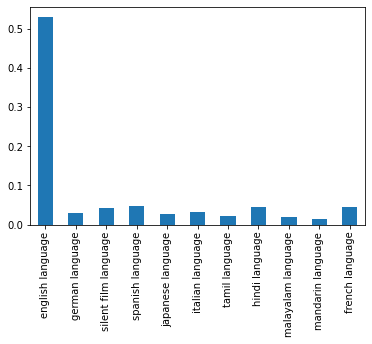

In [204]:
repre_languages.plot.bar()

<AxesSubplot:>

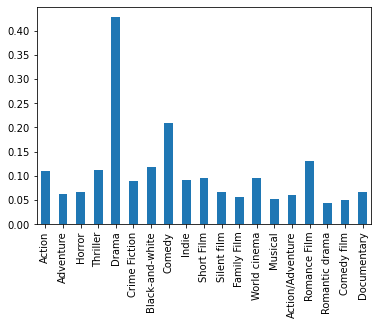

In [205]:
repre_genres.plot.bar()

In [206]:
#Most representative feature indicators

def representative_feature_indicator(df,feature,representative_features):    
    feature_indicator = []

    #create the indicators based on representative features 
    for lang in representative_features.index:
        feature_indicator.append(pd.DataFrame({lang: feature.apply(lambda x: lang in x).values}))

    feature_indicator = pd.concat(feature_indicator, axis = 1)
    feature_indicator = feature_indicator.set_index(df.index)
    return feature_indicator

In [207]:
#representative languages indicators for each movie
language_indicator=representative_feature_indicator(movie_metadata,movie_metadata.languages,repre_languages)
genre_indicator=representative_feature_indicator(movie_metadata,movie_metadata.genres,repre_genres)

#merge the feature indicators 
movie_metadata = pd.merge(movie_metadata, language_indicator, left_index = True, right_index = True)
movie_metadata = pd.merge(movie_metadata, genre_indicator, left_index = True, right_index = True)

movie_metadata.head()

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres,english language,...,Short Film,Silent film,Family Film,World cinema,Musical,Action/Adventure,Romance Film,Romantic drama,Comedy film,Documentary
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[english language],[united states of america],"[Action, Adventure, Horror, Science Fiction, S...",True,...,False,False,False,False,False,False,False,False,False,False
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[english language],[united states of america],"[Biographical film, Crime Drama, Drama, Mystery]",True,...,False,False,False,False,False,False,False,False,False,False
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,[norwegian language],[norway],"[Crime Fiction, Drama]",False,...,False,False,False,False,False,False,False,False,False,False
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,[english language],[united kingdom],"[Erotic thriller, Psychological thriller, Thri...",True,...,False,False,False,False,False,False,False,False,False,False
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,[german language],[germany],[Drama],False,...,False,False,False,False,False,False,False,False,False,False


In [208]:
movie_metadata.columns

Index(['movie_id', 'freebase_movie_id', 'movie_name', 'release_date',
       'box_office_revenue', 'runtime', 'languages', 'countries', 'genres',
       'english language', 'german language', 'silent film language',
       'spanish language', 'japanese language', 'italian language',
       'tamil language', 'hindi language', 'malayalam language',
       'mandarin language', 'french language', 'Action', 'Adventure', 'Horror',
       'Thriller', 'Drama', 'Crime Fiction', 'Black-and-white', 'Comedy',
       'Indie', 'Short Film', 'Silent film', 'Family Film', 'World cinema',
       'Musical', 'Action/Adventure', 'Romance Film', 'Romantic drama',
       'Comedy film', 'Documentary'],
      dtype='object')

## 1.3# Data Merging ##

### 1.3.1# Data relative to the movies only

In [209]:
# We prevent plot summaries without any other metadata
movie_data = movie_metadata.merge(plot_summaries, how='left')
movie_data.head(5)

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres,english language,...,Silent film,Family Film,World cinema,Musical,Action/Adventure,Romance Film,Romantic drama,Comedy film,Documentary,plot_summary
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[english language],[united states of america],"[Action, Adventure, Horror, Science Fiction, S...",True,...,False,False,False,False,False,False,False,False,False,"Set in the second half of the 22nd century, th..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[english language],[united states of america],"[Biographical film, Crime Drama, Drama, Mystery]",True,...,False,False,False,False,False,False,False,False,False,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,[norwegian language],[norway],"[Crime Fiction, Drama]",False,...,False,False,False,False,False,False,False,False,False,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,[english language],[united kingdom],"[Erotic thriller, Psychological thriller, Thri...",True,...,False,False,False,False,False,False,False,False,False,A series of murders of rich young women throug...
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,[german language],[germany],[Drama],False,...,False,False,False,False,False,False,False,False,False,"Eva, an upper class housewife, becomes frustra..."


### 1.3.2# Data relative to the characters

In [210]:
def merge_uncomplete_features(main_df, df, merging_feature, how_='left'):
    """ Enrich the NaN values of main_df features, if possible, by merging with df.
    
    Args:
        main_df (pd.DataFrame): dataframe whose NaN values will be replaced if possible on some common features
        df (pd.DataFrame): dataframe that complete NaN values of main_df
        merging_feature (pd.Series): common feature between main_df and df that will permit the merge between the two
        how_  (str): how argument of the merge
        
    Return:
        df_merge (pd.DataFrame): updated version of main_df
    """
    
    # Merge on the merging feature + extent common features in 2 columns such as 'movie_name' and 'movie_name_copy'
    df_merge = pd.merge(main_df, df.set_index(merging_feature), how=how_, right_index=True, left_on=merging_feature, suffixes=['', '_copy'])
    
    # Common features between main_df and df
    common_features = np.array(main_df.columns.intersection(df.set_index(merging_feature).columns))
    
    # Invert the Nan value of the initial main_df feature with its version in df, then drop the copied feature
    for ind, feature in enumerate(common_features):
        df_merge.loc[df_merge[feature].isnull(), [feature, feature + '_copy']] = df_merge.loc[df_merge[feature].isnull(), [feature + '_copy', feature]].values
        df_merge = df_merge.drop(feature + '_copy', axis=1)
    
    return df_merge

In [211]:
# Enrich the NaN values within the char_name feature of char_metadata with names_clusters if possible. 
char_data = merge_uncomplete_features(char_metadata, name_clusters, 'freebase_char_actor_map_id')
char_data = char_data[~char_data.index.duplicated()]
char_data.head(5)

,movie_id,freebase_movie_id,release_date,char_name,actor_birth_date,actor_gender,actor_height,freebase_actor_ethnicity,actor_name,actor_age_at_movie_release,freebase_char_actor_map_id,freebase_char_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [212]:
# Enrich the NaN values within numerous features of char_metadata with tvtropes_clusters if possible + add char_tropes features
char_data = merge_uncomplete_features(char_data, tvtropes_clusters, 'freebase_char_actor_map_id')
char_data.head(5)

,movie_id,freebase_movie_id,release_date,char_name,actor_birth_date,actor_gender,actor_height,freebase_actor_ethnicity,actor_name,actor_age_at_movie_release,freebase_char_actor_map_id,freebase_char_id,freebase_actor_id,movie_name,char_trope_1,char_trope_2,char_trope_3,char_trope_4,char_trope_5
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,NaN,NaN,NaN,NaN,NaN,NaN
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,NaN,NaN,NaN,NaN,NaN,NaN
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,NaN,NaN,NaN,NaN,NaN,NaN
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,NaN,NaN,NaN,NaN,NaN,NaN
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,NaN,NaN,NaN,NaN,NaN,NaN


# Character gender proportion

In [213]:
gender_presence = char_data.groupby('movie_id')['actor_gender'].value_counts(normalize = True).unstack()
gender_presence.columns = [f"{x}_gender_porportion" for x in gender_presence.columns.tolist()]
gender_presence.fillna(0, inplace = True)
gender_presence.head()

,F_gender_porportion,M_gender_porportion
movie_id,,
330,1.000000,0.000000
3217,0.230769,0.769231
3333,0.428571,0.571429
3746,0.214286,0.785714
3837,0.100000,0.900000


In [214]:
movie_data = pd.merge(movie_data, gender_presence, left_on = 'movie_id', right_on = 'movie_id')
movie_data.head()[gender_presence.columns]

,F_gender_porportion,M_gender_porportion
0,0.352941,0.647059
1,0.266667,0.733333
2,0.500000,0.500000
3,0.500000,0.500000
4,0.333333,0.666667


In [215]:
char_metadata.actor_birth_date = pd.to_datetime(char_metadata.actor_birth_date.replace(np.nan, pd.NaT),\
                                       errors='coerce',\
                                       exact=False,\
                                       infer_datetime_format=True)\
                                       .apply(lambda d : d.date())

In [216]:
char_metadata

,movie_id,freebase_movie_id,release_date,char_name,actor_birth_date,actor_gender,actor_height,freebase_actor_ethnicity,actor_name,actor_age_at_movie_release,freebase_char_actor_map_id,freebase_char_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05-01,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaT,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [217]:
movie_data.head()

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres,english language,...,World cinema,Musical,Action/Adventure,Romance Film,Romantic drama,Comedy film,Documentary,plot_summary,F_gender_porportion,M_gender_porportion
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[english language],[united states of america],"[Action, Adventure, Horror, Science Fiction, S...",True,...,False,False,False,False,False,False,False,"Set in the second half of the 22nd century, th...",0.352941,0.647059
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[english language],[united states of america],"[Biographical film, Crime Drama, Drama, Mystery]",True,...,False,False,False,False,False,False,False,NaN,0.266667,0.733333
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,[norwegian language],[norway],"[Crime Fiction, Drama]",False,...,False,False,False,False,False,False,False,NaN,0.500000,0.500000
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,[english language],[united kingdom],"[Erotic thriller, Psychological thriller, Thri...",True,...,False,False,False,False,False,False,False,A series of murders of rich young women throug...,0.500000,0.500000
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,[german language],[germany],[Drama],False,...,False,False,False,False,False,False,False,"Eva, an upper class housewife, becomes frustra...",0.333333,0.666667


# Plot summary lexical feature engineering

In [218]:
lexical_data = pd.read_csv(DATA_PATHWAY + 'plot_lexicon.csv', sep=',').drop(labels=['plot_summary'], axis=1)
movie_data = pd.merge(movie_data, lexical_data, left_on='movie_id', right_on='movie_id')
movie_data['pn'] = movie_data['positive_count']/(movie_data['positive_count'] + movie_data['negative_count'])

movie_data.head()

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres,english language,...,Romance Film,Romantic drama,Comedy film,Documentary,plot_summary,F_gender_porportion,M_gender_porportion,positive_count,negative_count,pn
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[english language],[united states of america],"[Action, Adventure, Horror, Science Fiction, S...",True,...,False,False,False,False,"Set in the second half of the 22nd century, th...",0.352941,0.647059,13,39,0.250000
1,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,[english language],[united kingdom],"[Erotic thriller, Psychological thriller, Thri...",True,...,False,False,False,False,A series of murders of rich young women throug...,0.500000,0.500000,18,60,0.230769
2,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,[german language],[germany],[Drama],False,...,False,False,False,False,"Eva, an upper class housewife, becomes frustra...",0.333333,0.666667,19,43,0.306452
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002-01-01,NaN,86.0,[english language],[south africa],"[Adventure, Family Film, Fantasy, World cinema]",True,...,False,False,False,False,"Every hundred years, the evil Morgana returns...",0.200000,0.800000,7,11,0.388889
4,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,[english language],[united states of america],"[Comedy, Comedy-drama, Drama, Ensemble Film, R...",True,...,True,True,False,False,"Adam, a San Francisco-based artist who works a...",0.666667,0.333333,9,20,0.310345


In [219]:
movie_data.shape[0]

35734

<AxesSubplot:xlabel='pn', ylabel='Count'>

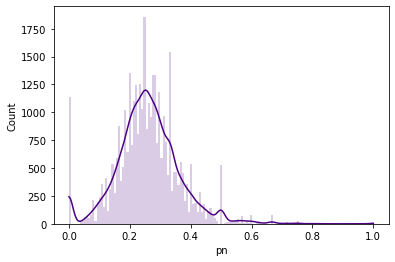

In [220]:
sns.histplot(movie_data['pn'], kde=True, alpha=0.2,linewidth=0, color = 'indigo')

In [221]:
movie_data.movie_name = movie_data.movie_name.apply(lambda x: x.lower().strip())

The following code is commented due to that it cannot be run from a cloned version of the repository directly as the IMDb datasets are past the GitHub 100 MB limit. To be able to reproduce this section of code refer to the README, to obtain the data and folder structure needed to do so.

``` python
# Set movie name as index
movie_data = movie_data.set_index('movie_name')

# Load IMDb datasets
akas = pd.read_csv('./data/imdb/title_akas.tsv', sep = "\t").dropna()
ratings = pd.read_csv('./data/imdb/title_ratings.tsv', sep = "\t")

# Set akas titles to lowercase and strip any stray whitespace
akas.title = akas.title.apply(lambda x: x.lower().strip())

akas.drop_duplicates(subset = 'title', inplace = True)

# Take only features used for future merge
akas = akas[["titleId", "title"]].set_index('title')

# Merge and drop dup
movie_data = pd.merge(movie_data, akas, left_index= True, right_index = True)

# Merge scores based on merged IMDb indexes
movie_data = pd.merge(movie_data, ratings, left_on = 'titleId', right_on = 'tconst')

# Drop unused indexes
movie_data.drop(['titleId', 'tconst'], axis = 1, inplace = True)
```

In [222]:
movie_data = pd.read_csv('./data/movie_data_imdbscores.csv')
movie_data.head()

,movie_id,freebase_movie_id,release_date,box_office_revenue,runtime,languages,countries,genres,english language,german language,...,Comedy film,Documentary,plot_summary,F_gender_porportion,M_gender_porportion,positive_count,negative_count,pn,averageRating,numVotes
0,30332673,/m/0crs0hx,2010,NaN,90.0,[''],['united states of america'],"['Comedy', 'Comedy film', 'Sex comedy', 'Sport...",False,False,...,True,False,Two horny college guys get summer jobs at a ch...,0.666667,0.333333,9,9,0.500000,3.7,3222
1,4213160,/m/0bq8q8,1971-12-17,NaN,119.0,['english language'],['united states of america'],"['Action', 'Action/Adventure', 'Comedy', 'Crim...",True,False,...,False,False,"Set in Hamburg, West Germany, several criminal...",0.250000,0.750000,16,46,0.258065,6.3,2631
2,20624798,/m/05222ld,2008,NaN,78.0,['english language'],"['australia', 'israel']","['Animation', 'Drama', 'Indie', 'Stop motion',...",True,False,...,False,False,The film mainly focuses on 28-year-old Dave Pe...,0.111111,0.888889,5,6,0.454545,7.2,22
3,2250713,/m/06z7m4,1988,NaN,98.0,['english language'],"['hungary', 'united states of america']","['Coming of age', 'Drama', 'Family Drama', 'Pe...",True,False,...,False,False,The father escaped the Soviet invasion of Buda...,0.000000,1.000000,2,22,0.083333,5.9,82
4,10331139,/m/02q8q5n,1974,NaN,91.0,['english language'],['united states of america'],"['Action', 'Drama', 'Thriller']",True,False,...,False,False,The film follows a poacher named Desiree who l...,1.000000,0.000000,2,9,0.181818,5.4,1277


In [223]:
movie_data.columns

Index(['movie_id', 'freebase_movie_id', 'release_date', 'box_office_revenue',
       'runtime', 'languages', 'countries', 'genres', 'english language',
       'german language', 'silent film language', 'spanish language',
       'japanese language', 'italian language', 'tamil language',
       'hindi language', 'malayalam language', 'mandarin language',
       'french language', 'Action', 'Adventure', 'Horror', 'Thriller', 'Drama',
       'Crime Fiction', 'Black-and-white', 'Comedy', 'Indie', 'Short Film',
       'Silent film', 'Family Film', 'World cinema', 'Musical',
       'Action/Adventure', 'Romance Film', 'Animation', 'Comedy film',
       'Documentary', 'plot_summary', 'F_gender_porportion',
       'M_gender_porportion', 'positive_count', 'negative_count', 'pn',
       'averageRating', 'numVotes'],
      dtype='object')